In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path = 'data/'
df_train= pd.read_csv(data_path + 'train_data.csv')
df_test= pd.read_csv(data_path + 'test_features.csv')
print('train',df_train.shape)
print('test',df_test.shape)

train (113, 22)
test (33, 21)


In [4]:
train_Y = df_train['poi']
df_train = df_train.drop(['poi'] , axis=1)
print('train_Y',train_Y.shape)
print('df_train',df_train.shape)

train_Y (113,)
df_train (113, 21)


In [5]:
df = pd.concat([df_train, df_test])
df.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [6]:
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


In [7]:
df.columns[df.dtypes=='float64'].values

array(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'], dtype=object)

In [8]:
none_cols = df.columns[df.dtypes=='float64'].values
for col in none_cols:
    df[col] = df[col].fillna(0)

In [9]:
df.columns[df.dtypes!='float64'].values

array(['name', 'email_address'], dtype=object)

In [10]:
df=df.drop(labels=df.columns[df.dtypes!='float64'].values,axis=1)

In [11]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,1.460000e+02,1.460000e+02
mean,1.333474e+06,4.387965e+05,-3.827622e+05,1.942249e+04,4.182736e+06,7.074827e+04,358.602740,38.226027,24.287671,1.149658e+06,6.646839e+05,5.854318e+05,1.749257e+06,2.051637e+04,3.658114e+05,692.986301,1221.589041,4.350622e+06,5.846018e+06
std,8.094029e+06,2.741325e+06,2.378250e+06,1.190543e+05,2.607040e+07,4.327163e+05,1441.259868,73.901124,79.278206,9.649342e+06,4.046072e+06,3.682345e+06,1.089995e+07,1.439661e+06,2.203575e+06,1072.969492,2226.770637,2.693448e+07,3.624681e+07
min,0.000000e+00,-1.025000e+05,-2.799289e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-7.576788e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.115000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,9.394475e+04,2.288695e+05
50%,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,6.082935e+05,2.018200e+04,16.500000,2.500000,0.000000,0.000000e+00,0.000000e+00,9.595000e+02,3.605280e+05,0.000000e+00,2.105960e+05,102.500000,289.000000,9.413595e+05,9.659550e+05
75%,8.000000e+05,9.684500e+03,0.000000e+00,0.000000e+00,1.714221e+06,5.374075e+04,51.250000,40.750000,13.750000,0.000000e+00,3.750648e+05,1.506065e+05,8.145280e+05,0.000000e+00,2.708505e+05,893.500000,1585.750000,1.968287e+06,2.319991e+06
max,9.734362e+07,3.208340e+07,0.000000e+00,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


bonus


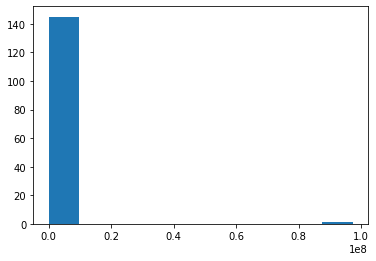

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
deferral_payments


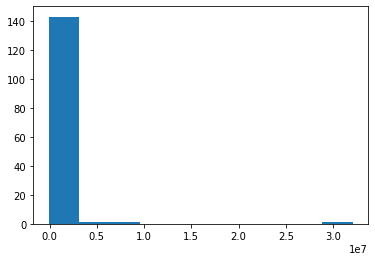

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
deferred_income


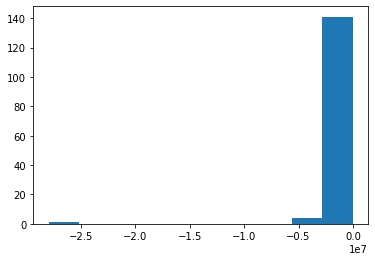

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
director_fees


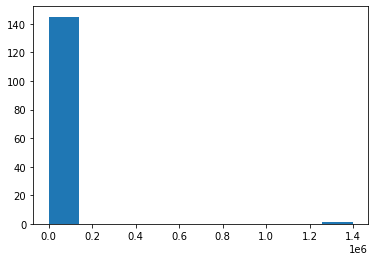

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
exercised_stock_options


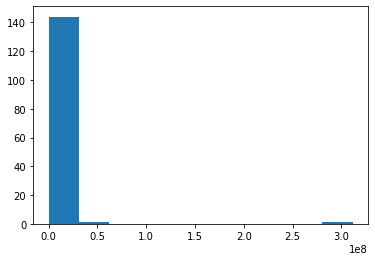

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
expenses


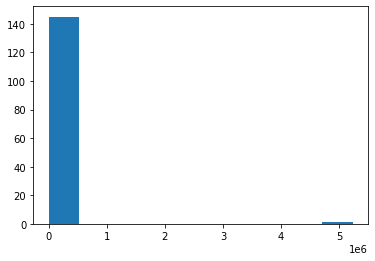

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
from_messages


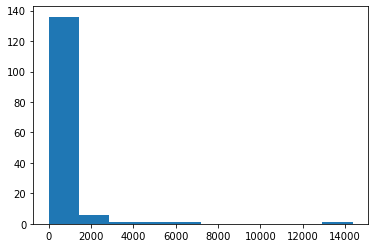

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
from_poi_to_this_person


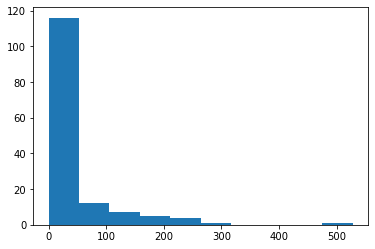

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
from_this_person_to_poi


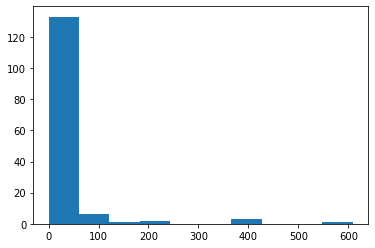

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
loan_advances


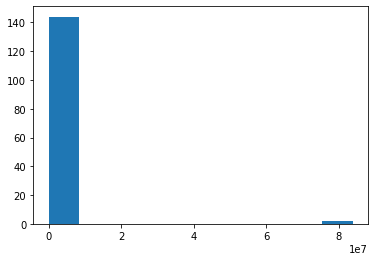

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
long_term_incentive


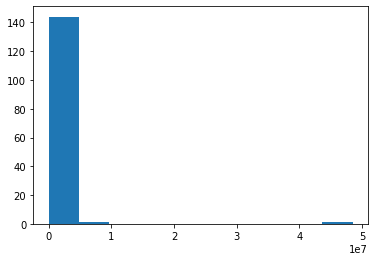

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
other


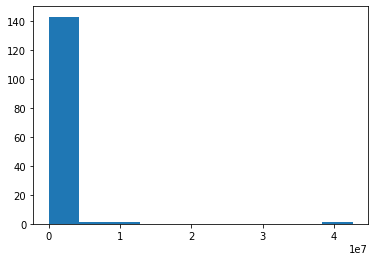

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
restricted_stock


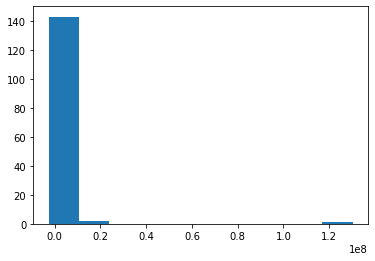

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
restricted_stock_deferred


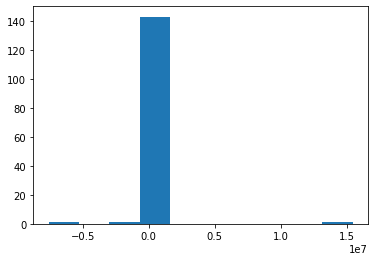

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
salary


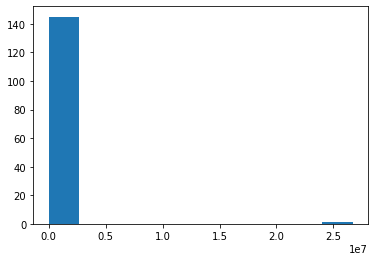

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
shared_receipt_with_poi


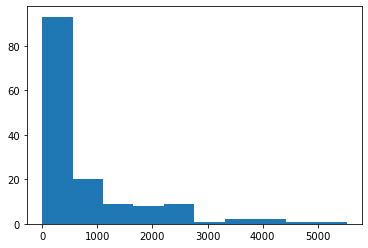

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
to_messages


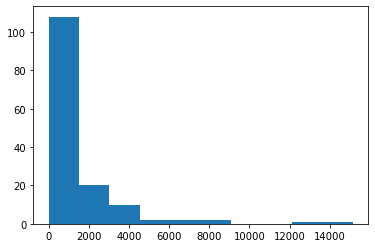

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
total_payments


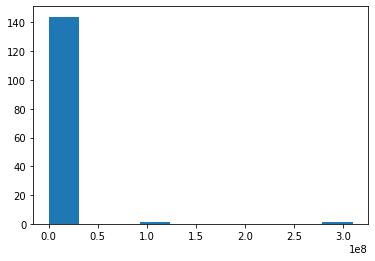

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------
total_stock_value


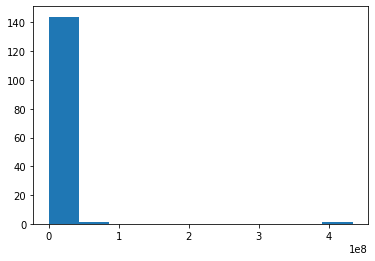

0.0       60
29.0       4
16.0       4
12.0       4
19.0       4
          ..
17.0       1
146.0      1
30.0       1
222.0      1
6759.0     1
Name: from_messages, Length: 65, dtype: int64
---------------------------


In [12]:
for i in df.columns:
    print(i)
    plt.hist(df[i])
    plt.show()
    print(df[i].value_counts())
    print('---------------------------')

In [154]:
y_train

15     False
57     False
9       True
86     False
83     False
       ...  
72     False
56     False
3       True
24     False
106    False
Name: poi, Length: 90, dtype: bool

In [13]:
train_X=df.iloc[0:df_train.shape[0],:].reset_index(drop=True)

bonus


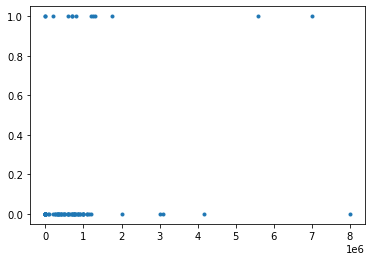

Correlation: 0.2926
---------------------------
deferral_payments


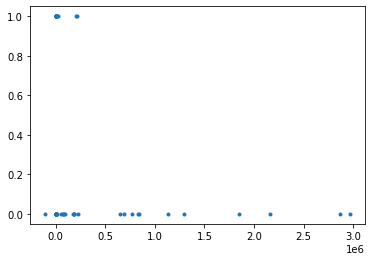

Correlation: -0.0878
---------------------------
deferred_income


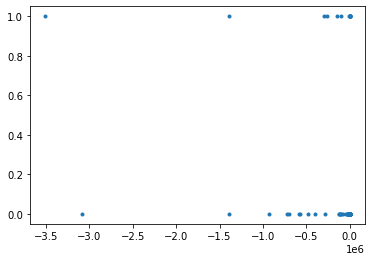

Correlation: -0.2220
---------------------------
director_fees


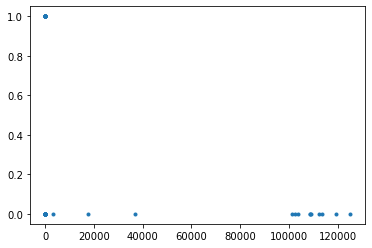

Correlation: -0.1177
---------------------------
exercised_stock_options


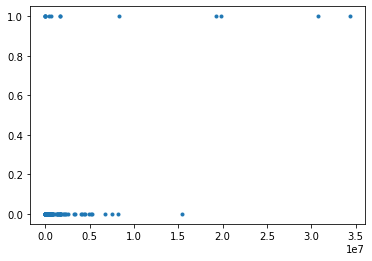

Correlation: 0.4720
---------------------------
expenses


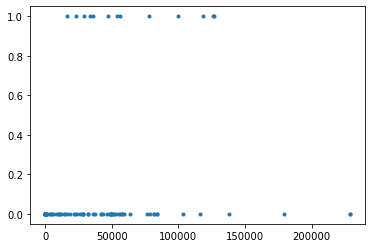

Correlation: 0.2548
---------------------------
from_messages


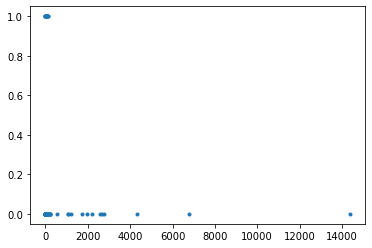

Correlation: -0.0828
---------------------------
from_poi_to_this_person


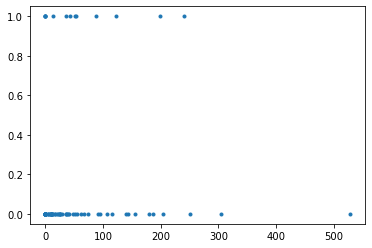

Correlation: 0.1312
---------------------------
from_this_person_to_poi


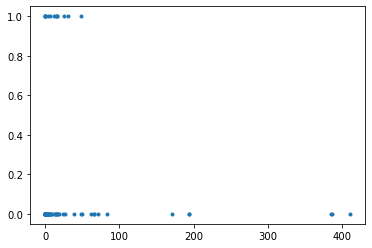

Correlation: -0.0520
---------------------------
loan_advances


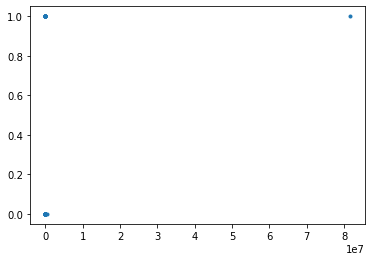

Correlation: 0.2619
---------------------------
long_term_incentive


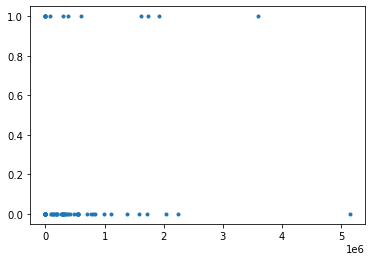

Correlation: 0.2176
---------------------------
other


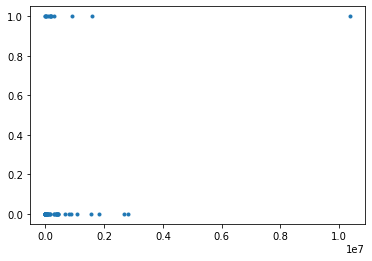

Correlation: 0.2705
---------------------------
restricted_stock


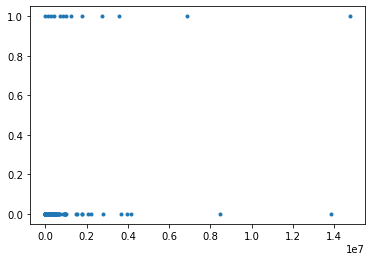

Correlation: 0.2797
---------------------------
restricted_stock_deferred


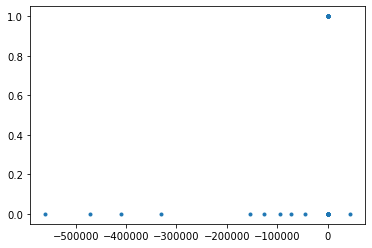

Correlation: 0.0827
---------------------------
salary


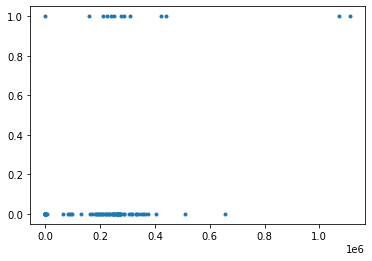

Correlation: 0.3953
---------------------------
shared_receipt_with_poi


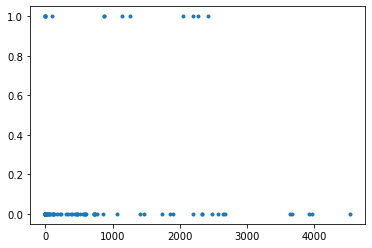

Correlation: 0.1291
---------------------------
to_messages


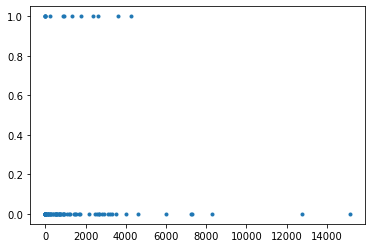

Correlation: 0.0215
---------------------------
total_payments


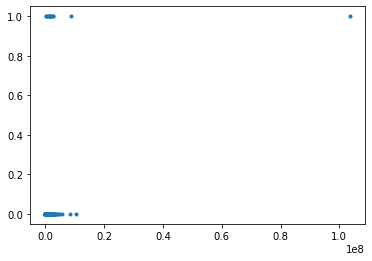

Correlation: 0.2814
---------------------------
total_stock_value


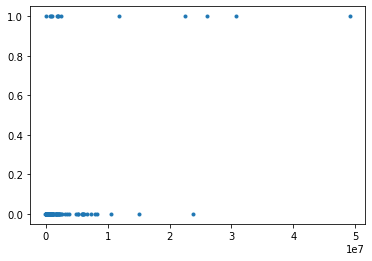

Correlation: 0.4567
---------------------------


In [21]:
d1=[]
for i in train_X.columns:
    print(i)
    plt.plot(train_X[i], train_Y, '.')
    plt.show()
    #print(train_X[i].value_counts())
    corr = np.corrcoef(train_X[i], train_Y)
    if abs(corr[0][1])<0.1:
        d1.append(i)
    print("Correlation: %.4f" % (corr[0][1]))
    print('---------------------------')


In [22]:
d1

['deferral_payments',
 'from_messages',
 'from_this_person_to_poi',
 'restricted_stock_deferred',
 'to_messages']

In [25]:
df=df.drop(labels=d1,axis=1)

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [26]:
scaler = MinMaxScaler()
scaler =scaler.fit(df)

In [27]:
train_X=df.iloc[0:df_train.shape[0],:].reset_index(drop=True)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=3)

In [29]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [30]:
clf=linear_model.LogisticRegression()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8260869565217391


In [31]:
clf=DecisionTreeClassifier()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8695652173913043


In [32]:
clf=RandomForestClassifier(n_estimators=100, max_depth=4)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8260869565217391


In [33]:
clf=GradientBoostingClassifier()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8695652173913043


In [34]:
# 設定要訓練的超參數組合
n_estimators = [100, 200, 300]
max_depth = [1, 3, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

# 預設會跑 3-fold cross-validadtion，總共 9 種參數組合，總共要 train 27 次模型

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.8s finished


In [35]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.888889 using {'max_depth': 3, 'n_estimators': 300}


In [36]:
# 使用最佳參數重新建立模型
clf_bestparam = GradientBoostingClassifier(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'])

# 訓練模型
clf_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8695652173913043


In [37]:
print("Feature importance: ", clf_bestparam.feature_importances_)

Feature importance:  [9.38624979e-05 2.85241532e-02 3.59000159e-07 3.13258384e-01
 2.70091828e-01 1.59043036e-02 5.74244745e-05 4.94990317e-03
 1.55721632e-01 1.00831173e-01 4.84676218e-04 8.16490404e-02
 1.97191821e-04 2.82360681e-02]


In [39]:
feature_select=pd.DataFrame({'n':range(14),'importance':clf_bestparam.feature_importances_})
feature_select.sort_values(by='importance',ascending=False).reset_index(drop=True)

,n,importance
0,3,3.132584e-01
1,4,2.700918e-01
2,8,1.557216e-01
3,9,1.008312e-01
4,11,8.164904e-02
5,1,2.852415e-02
6,13,2.823607e-02
7,5,1.590430e-02
8,7,4.949903e-03
9,10,4.846762e-04


In [40]:
list(feature_select.sort_values(by='importance',ascending=False).head(11).n)

[3, 4, 8, 9, 11, 1, 13, 5, 7, 10, 12]

In [41]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
x_train.loc[:,list(feature_select.sort_values(by='importance',ascending=False).head(11).n)]

,3,4,8,9,11,1,13,5,7,10,12
0,0.002455,0.016085,0.000006,0.021016,0.421300,1.000000,0.002298,0.047348,0.017143,0.009307,0.006502
1,0.002824,0.008225,0.000018,0.022674,0.134396,0.998809,0.002127,0.115530,0.000000,0.007381,0.005607
2,0.001234,0.024064,0.004695,0.022556,0.158305,1.000000,0.001893,0.098485,0.001464,0.010297,0.004106
3,0.006945,0.005366,0.036415,0.047088,0.079152,1.000000,0.013494,0.053030,0.006440,0.003193,0.006388
4,0.001625,0.043697,0.001209,0.022912,0.266075,0.995535,0.002283,0.098485,0.000000,0.009864,0.004256
...,...,...,...,...,...,...,...,...,...,...,...
85,0.001385,0.000000,0.000000,0.019925,0.000000,0.999107,0.001095,0.000000,0.000000,0.000000,0.000270
86,0.000000,0.000244,0.000000,0.019593,0.000000,0.995935,0.000101,0.000000,0.000000,0.000000,0.000004
87,0.000000,0.022565,0.021269,0.027004,0.000000,1.000000,0.002368,0.000000,0.012421,0.008400,0.008560
88,0.002091,0.000000,0.000000,0.022500,0.010505,1.000000,0.002491,0.018939,0.000000,0.000000,0.000000


In [42]:
# 使用最佳參數重新建立模型
clf_bestparam = GradientBoostingClassifier(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'])

# 訓練模型
clf_bestparam.fit(x_train.loc[:,list(feature_select.sort_values(by='importance',ascending=False).head(11).n)], y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test.loc[:,list(feature_select.sort_values(by='importance',ascending=False).head(11).n)])

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8695652173913043


In [43]:
df_test_select=df_test.iloc[:,(df_test.columns).isin(df.columns.values)]

In [44]:
none_cols = df_test_select.columns[df_test_select.dtypes=='float64'].values
for col in none_cols:
    df_test_select[col] = df_test_select[col].fillna(0)

In [45]:
df_test_select=scaler.transform(df_test_select)

In [46]:
df_test_select.min()

0.0

In [47]:
df_test_select=pd.DataFrame(df_test_select)

In [48]:
y_pred = clf_bestparam.predict_proba(df_test_select.loc[:,list(feature_select.sort_values(by='importance',ascending=False).head(11).n)])

In [49]:
y_pred[:,1]

array([4.65937472e-02, 6.78632575e-05, 6.66553622e-01, 9.63951367e-05,
       5.90454089e-02, 7.83729455e-01, 2.92510699e-02, 6.02324535e-05,
       5.67805872e-04, 3.45380814e-05, 1.49732346e-04, 1.14348441e-05,
       2.16081622e-05, 6.02324535e-05, 2.26816201e-02, 1.14354539e-05,
       4.11626196e-05, 9.72382629e-01, 3.57966966e-03, 1.14354539e-05,
       9.88488117e-01, 5.28548864e-01, 1.34491933e-04, 4.47759955e-05,
       2.86076033e-05, 9.36622084e-05, 2.91903097e-05, 2.96650777e-05,
       1.21288068e-03, 4.26994167e-04, 3.25915947e-06, 1.54762915e-05,
       1.54831420e-02])

In [50]:
final=pd.DataFrame({'name':df_test['name'],'poi':y_pred[:,1]})

final

,name,poi
0,BELDEN TIMOTHY N,0.046594
1,BOWEN JR RAYMOND M,0.000068
2,HANNON KEVIN P,0.666554
3,DELAINEY DAVID W,0.000096
4,CAUSEY RICHARD A,0.059045
5,HICKERSON GARY J,0.783729
6,FREVERT MARK A,0.029251
7,CHAN RONNIE,0.000060
8,DONAHUE JR JEFFREY M,0.000568
9,REYNOLDS LAWRENCE,0.000035


In [51]:
final.to_csv('Day_051.csv',index=False)

In [33]:
df['from_messages'].value_counts().reset_index().sort_values(by='index')

,index,from_messages
0,0.0,60
3,12.0,4
11,13.0,2
8,14.0,2
46,15.0,1
...,...,...
36,2742.0,1
34,3069.0,1
29,4343.0,1
64,6759.0,1


In [9]:
df_train.columns

Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')

In [11]:
train_Y

0       True
1       True
2       True
3       True
4       True
       ...  
108    False
109    False
110    False
111    False
112    False
Name: poi, Length: 113, dtype: bool